# Яндекс Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

Составьте первое представление о данных Яндекс Музыки.




**Задание 1**

In [1238]:
import pandas as pd # импорт библиотеки pandas

**Задание 2**

In [1239]:
df = pd.read_csv('/datasets/yandex_music_project.csv') # чтение файла с данными и сохранение в df

**Задание 3**

In [1240]:
print(df.head(10)) # получение первых 10 строк таблицы df

     userID                        Track            artist   genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile    rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg    rock   
2    20EC38            Funiculì funiculà       Mario Lanza     pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice    folk   
4  E2DC1FAE                  Soul People        Space Echo   dance   
5  842029A1                    Преданная         IMPERVTOR  rusrap   
6  4CB90AA5                         True      Roman Messer   dance   
7  F03E1C1F             Feeling This Way   Polina Griffith   dance   
8  8FA1D3BE     И вновь продолжается бой               NaN  ruspop   
9  E772D5C0                    Pessimist               NaN   dance   

             City        time        Day  
0  Saint-Petersburg  20:28:33  Wednesday  
1            Moscow  14:07:09     Friday  
2  Saint-Petersburg  20:58:07  Wednesday  
3  Saint-Petersburg  08:37:09     Monday  
4            M

**Задание 4**

In [1241]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Задание 5**

In [1242]:
# пропущены нижние подчеркивания # Напишите ваш ответ здесь комментарием. Не удаляйте символ #. Не меняйте тип этой ячейки на Markdown.

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Переименование столбцов

**Задание 6**

In [1243]:
print(df.columns) # перечень названий столбцов таблицы df

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


**Задание 7**

In [1244]:
df = df.rename(columns={'  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day': 'day'}) # переименование столбцов

**Задание 8**

In [1245]:
print(df.columns)# проверка результатов - перечень названий столбцов

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


### Обработка пропущенных значений

**Задание 9**

In [1246]:
print(df.isna().sum()) # подсчёт пропусков

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64


**Задание 10**

In [1247]:
columns_to_replace = ['track', 'artist', 'genre']
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')# замена пропущенных значений на 'unknown'

**Задание 11**

In [1248]:
print(df.isna().sum())# проверка на отсутствие пропусков

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### Обработка дубликатов

**Задание 12**

In [1249]:
print(df.duplicated().sum())# подсчёт явных дубликатов

3826


**Задание 13**

In [1250]:
df = df.drop_duplicates().reset_index(drop=True)# удаление явных дубликатов, создание новых индексов и удаление старых

**Задание 14**

In [1251]:
print(df.duplicated().sum())# проверка на отсутствие явных дубликатов

0


**Задание 15**

In [1252]:
genr = df[['genre']]
genr = genr.sort_values(by = 'genre')# просмотр уникальных отсортированных названий жанров
print(genr['genre'].unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

**Задание 16**

In [1253]:

def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

first_name = ['hip', 'hop', 'hip-hop']
two_name = 'hiphop'
replace_wrong_genres(first_name, two_name)
print(df)

        user_id                              track            artist  \
0      FFB692EC                  Kamigata To Boots  The Mass Missile   
1      55204538        Delayed Because of Accident  Andreas Rönnberg   
2        20EC38                  Funiculì funiculà       Mario Lanza   
3      A3DD03C9              Dragons in the Sunset        Fire + Ice   
4      E2DC1FAE                        Soul People        Space Echo   
...         ...                                ...               ...   
61248  729CBB09                            My Name            McLean   
61249  D08D4A55  Maybe One Day (feat. Black Spade)       Blu & Exile   
61250  C5E3A0D5                          Jalopiina           unknown   
61251  321D0506                      Freight Train     Chas McDevitt   
61252  3A64EF84          Tell Me Sweet Little Lies      Monica Lopez   

            genre              city      time        day  
0            rock  Saint-Petersburg  20:28:33  Wednesday  
1            rock

**Задание 17**

In [1254]:
genr = df[['genre']]
genr = genr.sort_values(by = 'genre')# просмотр уникальных отсортированных названий жанров
print(genr['genre'].unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез.

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга.
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


**Задание 18**



In [1255]:
df_city_time = df.groupby('city')['time'].count()# подсчёт прослушиваний в каждом городе
print(df_city_time)

city
Moscow              42741
Saint-Petersburg    18512
Name: time, dtype: int64


**Задание 19**


In [1256]:
df_day_time = df.groupby('day')['time'].count()# подсчёт прослушиваний в каждый из трёх дней
print(df_day_time)

day
Friday       21840
Monday       21354
Wednesday    18059
Name: time, dtype: int64


**Задание 20**

In [1257]:
def number_tracks(day, city):
    track_list = df[(df['day'] == day)] # выберите только строки df со значением переменной day в столбце day
    track_list = track_list[(track_list['city'] == city)] # выберите только строки track_list со значением переменной city в столбце city
    track_list_count = track_list['user_id'].count()# вызовите метод подсчета строк для track_list и выберите столбец user_id
    return track_list_count # верните значение track_list_count из функции


**Задание 21**

In [1258]:
print(number_tracks('Monday', 'Moscow')) # количество прослушиваний в Москве по понедельникам

15740


In [1259]:
print(number_tracks('Monday', 'Saint-Petersburg'))# количество прослушиваний в Санкт-Петербурге по понедельникам

5614


In [1260]:
print(number_tracks('Wednesday', 'Moscow'))# количество прослушиваний в Москве по средам

11056


In [1261]:
print(number_tracks('Wednesday', 'Saint-Petersburg'))# количество прослушиваний в Санкт-Петербурге по средам

7003


In [1262]:
print(number_tracks('Friday', 'Moscow'))# количество прослушиваний в Москве по пятницам

15945


In [1263]:
print(number_tracks('Friday', 'Saint-Petersburg'))# количество прослушиваний в Санкт-Петербурге по пятницам

5895


**Задание 22**

In [1264]:
info = pd.DataFrame(data=[['Москва', 15750, 11056, 15945], ['Санкт-Петербург', 5614, 7003, 5895]], columns=['city', 'monday','wednesday','friday'])  # создание таблицы с результатами
print(info) # вывод таблицы на экран

              city  monday  wednesday  friday
0           Москва   15750      11056   15945
1  Санкт-Петербург    5614       7003    5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

**Задание 23**

In [1265]:
moscow_general = df[(df['city'] == 'Moscow')] # получение таблицы moscow_general из тех строк таблицы df, для которых значение в столбце 'city' равно 'Moscow'


In [1266]:
spb_general = df[(df['city'] == 'Saint-Petersburg')]# получение таблицы spb_general из тех строк таблицы df, для которых значение в столбце 'city' равно 'Saint-Petersburg'


**Задание 24**

In [1267]:
def genre_weekday(df, day, time1, time2):
    # последовательная фильтрация
    # оставляем в genre_df только те строки df, у которых день равен day
    genre_df = df[(df['day'] == day)] # ваш код здесь
    # оставляем в genre_df только те строки genre_df, у которых время меньше time2
    genre_df = genre_df[(genre_df['time'] < time2)] # ваш код здесь
    # оставляем в genre_df только те строки genre_df, у которых время больше time1
    genre_df = genre_df[(genre_df['time'] > time1)] # ваш код здесь
    # сгруппируем отфильтрованный датафрейм по столбцу с названиями жанров, возьмём столбец genre и посчитаем кол-во строк для каждого жанра методом count()
    genre_df_grouped = genre_df.groupby('genre')['genre'].count() # ваш код здесь
    # отсортируем результат по убыванию (чтобы в начале Series оказались самые популярные жанры)
    genre_df_sorted = genre_df_grouped.sort_values(ascending = False)# ваш код здесь
    # вернём Series с 10 самыми популярными жанрами в указанный отрезок времени заданного дня
    return genre_df_sorted[:10]

**Задание 25**

In [1268]:
print(genre_weekday(moscow_general, 'Monday', '07:00', '11:00'))# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: genre, dtype: int64


In [1269]:
print(genre_weekday(spb_general, 'Monday', '07:00', '11:00'))# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: genre, dtype: int64


In [1270]:
print(genre_weekday(moscow_general, 'Friday', '17:00', '23:00'))# вызов функции для вечера пятницы в Москве

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: genre, dtype: int64


In [1271]:
print(genre_weekday(spb_general, 'Friday', '17:00', '23:00'))# вызов функции для вечера пятницы в Петербурге

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: genre, dtype: int64


**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное различие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

**Задание 26**

In [1272]:
moscow_genres = moscow_general.groupby('genre')['genre'].count()# одной строкой: группировка таблицы moscow_general по столбцу 'genre', выбор столбца `genre`, подсчёт числа значений 'genre' методом count(), сохранение в moscow_genres
moscow_genres = moscow_genres.sort_values(ascending = False)# сортировка получившегося Series в порядке убывания и сохранение обратно в moscow_genres


**Задание 27**

In [1273]:
print(moscow_genres.head(10))# просмотр первых 10 строк moscow_genres

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64


**Задание 28**

In [1274]:
spb_genres = spb_general.groupby('genre')['genre'].count()# одной строкой: группировка таблицы spb_general по столбцу 'genre', выбор столбца `genre`, подсчёт числа значений 'genre' методом count(), сохранение в spb_genres
spb_genres = spb_genres.sort_values(ascending = False)# сортировка получившегося Series в порядке убывания и сохранение обратно в spb_genres

**Задание 29**

In [1275]:
print(spb_genres.head(10))# просмотр первых 10 строк spb_genres

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64


**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге.


## Итоги исследования

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге.

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего, чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из части данных одного сервиса невозможно сделать какие-то выводы о всех пользователях сервиса без методов статистики.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных.
С методами проверок гипотез вы ещё познакомитесь в следующих темах.

In [1]:
!pip install sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
} 

In [3]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
) 

In [4]:
engine = create_engine(connection_string)

In [5]:
query = '''
WITH profile AS
  (SELECT user_id,
          dt,
          COUNT(*) OVER (PARTITION BY dt) AS cohort_users_cnt
   FROM online_store.profiles
   WHERE channel = 'Organic'),
sessions AS 
(SELECT user_id,
        session_start::date AS session_date
FROM online_store.sessions
GROUP BY 1,
         2)
SELECT p.dt AS cohort_dt,
       session_date,
       COUNT(p.user_id) AS users_cnt,
       cohort_users_cnt,
       ROUND(COUNT(p.user_id) * 100.0 / cohort_users_cnt, 2) AS retention_rate
FROM profile p
JOIN sessions s ON p.user_id = s.user_id
GROUP BY 1,
         2,
         4
''' 

In [6]:
retention_rate_df = pd.read_sql_query(query, con = engine) 

In [7]:
print(retention_rate_df.head()) 

    cohort_dt session_date  users_cnt  cohort_users_cnt  retention_rate
0  2020-06-15   2020-06-21        688              4139           16.62
1  2020-06-17   2020-06-25        110              5600            1.96
2  2020-06-17   2020-06-24        122              5600            2.18
3  2020-06-22   2020-06-25       1059              4450           23.80
4  2020-06-16   2020-06-20        222              4438            5.00


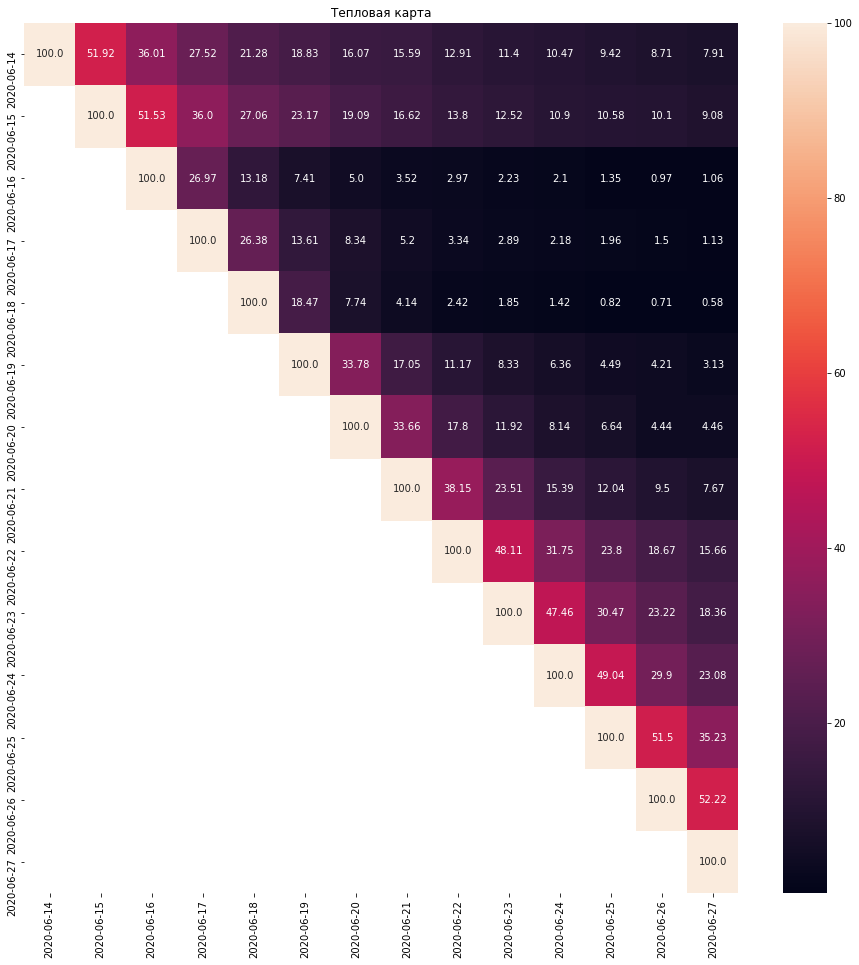

In [8]:
retention = retention_rate_df.pivot(index='cohort_dt', columns='session_date', values='retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

# строим хитмэп
plt.figure(figsize=(16, 16)) # задаём размер графика
sns.heatmap(retention, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Тепловая карта') # название графика
plt.show() 